In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
import glob
from skimage.filters import prewitt_h, prewitt_v
from skimage.io import imread, imshow
%matplotlib inline

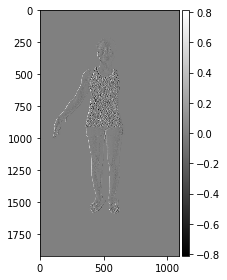

In [2]:
path = r'C:\Users\Justincul\Documents\Bracket_Stuff\Final_year_project\project_images\100\100_00002.jpg'
image = imread(path, as_gray = True)

edges_prewitt_horizontal = prewitt_h(image)
edges_prewitt_vertical = prewitt_v(image)

imshow(edges_prewitt_vertical, cmap = 'gray')

In [3]:
import numpy as np
import pandas as pd
file1=pd.read_excel('C:/Users/Justincul/Documents/Bracket_Stuff/Final_year_project/All Measurements.xlsx')
y= []
y.append(file1['Chest'])

In [4]:
from os import listdir
from os.path import isfile, join
from skimage import io
import numpy as np
import cv2

Train_data = []
Train_chest = []

Test_data = []
Test_chest = []

mypath = r'C:/Users/Justincul/Documents/Bracket_Stuff/Final_year_project/project_images/front'
for f in range(0, file1.shape[0]):
    im6 = cv2.imread(join(mypath,file1.iloc[f]['Front_Img_name']))
    im6_gray = cv2.cvtColor(im6, cv2.COLOR_BGR2GRAY)
    img_resize= cv2.resize(im6_gray,(224, 224))
    edges_prewitt_horizontal = prewitt_h(img_resize)
    edges_prewitt_vertical = prewitt_v(img_resize)
    vec6 = np.reshape(edges_prewitt_vertical, [1, 224*224])

    if (file1.iloc[f]['Is_train']):
        Test_data.append(vec6)
        Test_chest.append(file1.iloc[f]['Chest'])
    else:
        Train_data.append(vec6)
        Train_chest.append(file1.iloc[f]['Chest'])
        
Train_chest = (np.array(Train_chest).astype(np.float32))
Train_data = np.matrix(np.array(Train_data))

Test_chest = (np.array(Test_chest).astype(np.float32))
Test_data = np.matrix(np.array(Test_data))

In [5]:
Test_data.shape

(40, 50176)

In [6]:
Train_data.shape

(800, 50176)

In [7]:
np.sum(Test_data[1] - Test_data[2])

-1.4268100589909238e-16

In [8]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
Train_chest_encoded = lab_enc.fit_transform(Train_chest)
print(Train_chest_encoded)
print(utils.multiclass.type_of_target(Train_chest))
print(utils.multiclass.type_of_target(Train_chest.astype('int')))
print(utils.multiclass.type_of_target(Train_chest_encoded))

[11 11 11 11 11  7  7  7  7  7 12 12 12 12 12  7  7  7  7  7  6  6  6  6
  6  6  6  6  6  6  5  5  5  5  5  7  7  7  7  7  9  9  9  9  9  8  8  8
  8  8  6  6  6  6  6  5  5  5  5  5  6  6  6  6  6  7  7  7  7  7  7  7
  7  7  7  9  9  9  9  9  5  5  5  5  5  6  6  6  6  6  5  5  5  5  5  6
  6  6  6  6  9  9  9  9  9  4  4  4  4  4  3  3  3  3  3  6  6  6  6  6
  6  6  6  6  6  3  3  3  3  3  5  5  5  5  5  5  5  5  5  5  8  8  8  8
  8  6  6  6  6  6  4  4  4  4  4  7  7  7  7  7  7  7  7  7  7  5  5  5
  5  5  6  6  6  6  6  5  5  5  5  5  2  2  2  2  2  4  4  4  4  4  7  7
  7  7  7  5  5  5  5  5  5  5  5  5  5  7  7  7  7  7  7  7  7  7  7  4
  4  4  4  4  9  9  9  9  9  3  3  3  3  3  5  5  5  5  5  9  9  9  9  9
  8  8  8  8  8  5  5  5  5  5  3  3  3  3  3 10 10 10 10 10  3  3  3  3
  3  6  6  6  6  6  8  8  8  8  8  1  1  1  1  1  6  6  6  6  6 14 14 14
 14 14  6  6  6  6  6  4  4  4  4  4  6  6  6  6  6  5  5  5  5  5  5  5
  5  5  5  4  4  4  4  4  9  9  9  9  9  4  4  4  4

In [9]:
from sklearn import metrics, svm
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

Lr = LinearRegression()
Lr.fit(Train_data, Train_chest)
print("LinearRegression")
Predicted_lr =Lr.predict(Test_data)
print(Predicted_lr)

print("The MAE is ", metrics.mean_absolute_error(Test_chest, Predicted_lr))

print("The MSE is ", metrics.mean_squared_error(Test_chest, Predicted_lr))

print("The RMSE is ", np.sqrt(metrics.mean_squared_error(Test_chest, Predicted_lr)))

Error_lr = (abs(Test_chest - Predicted_lr))
print("The Max Error is", np.max(Error_lr))

print("The Min Error is", np.min(Error_lr))

LinearRegression
[12.90536853 13.3821316  10.5915556  11.38098811 12.82391575 12.68145985
 12.77417066 12.67591275 12.73368949 13.74513657 12.96012725 11.47153903
 11.14551755 12.9328626  13.2970524  12.32602392 12.74574432 12.12478584
 10.85648224 11.51811276 12.89188284 13.06815603 14.30936981 12.72257464
 12.04319212 13.18325482 12.56474616 15.04692047 11.89474502 14.07223206
 11.32525421 13.51128133 13.05777306 13.78045606 14.26632434 13.68738138
 14.41826622 15.75566376 13.11254845 13.52613505]
The MAE is  1.657877747536435
The MSE is  3.9323088387935825
The RMSE is  1.9830050022109331
The Max Error is 4.10525497845291
The Min Error is 0.06713740331984042


In [10]:
svr = svm.SVR()
svr.fit(Train_data, Train_chest)
print("SVR")
Predicted_svr = svr.predict(Test_data)
print(Predicted_svr)

print("The MAE is ", metrics.mean_absolute_error(Test_chest, Predicted_svr))

print("The MSE is ", metrics.mean_squared_error(Test_chest, Predicted_svr))

print("The RMSE is ", np.sqrt(metrics.mean_squared_error(Test_chest, Predicted_svr)))

Error_svr = (abs(Test_chest - Predicted_svr))
print("The Max Error is", np.max(Error_svr))

print("The Min Error is", np.min(Error_svr))

C:\Users\Justincul\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR
[12.91405179 12.91391417 12.89742133 12.89036262 12.90333526 12.90511416
 12.91167551 12.89799528 12.90706474 12.91971412 12.89994594 12.92581353
 12.89227931 12.91902172 12.90397511 12.90859929 12.90639346 12.91062089
 12.89423672 12.90817453 12.91714909 12.90816105 12.91065558 12.89953976
 12.90805127 12.89223174 12.91852433 12.93982298 12.90774196 12.92755031
 12.88324993 12.90947022 12.91817579 12.93842233 12.94830804 12.90919365
 12.92896246 12.94010832 12.90719998 12.93537024]
The MAE is  1.3893153414043156
The MSE is  3.24549699282546
The RMSE is  1.8015262953466595
The Max Error is 3.5936065372606407
The Min Error is 0.059891678342582466


In [11]:
LogReg = LogisticRegression()
LogReg.fit(Train_data, Train_chest_encoded)
print("LogisticRegression")
Predicted_lgr = LogReg.predict(Test_data)
print(Predicted_lgr)

print("The MAE is ", metrics.mean_absolute_error(Test_chest, Predicted_lgr))

print("The MSE is ", metrics.mean_squared_error(Test_chest, Predicted_lgr))

print("The RMSE is ", np.sqrt(metrics.mean_squared_error(Test_chest, Predicted_lgr)))

Error_lgr = (abs(Test_chest - Predicted_lgr))
print("The Max Error is", np.max(Error_lgr))

print("The Min Error is", np.min(Error_lgr))

C:\Users\Justincul\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Justincul\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression
[ 6  6  5  6  7  5  9  1  7  6  7  8  5  9  7  5  7  5  5  6  9  6  5  5
  7  5  7  7  7  9  5  6  9  8  5  6  7 11  5  9]
The MAE is  6.8
The MSE is  50.475
The RMSE is  7.10457599016296
The Max Error is 10.0
The Min Error is 2.0


In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
model_name = "Decision Tree Regressor"
decisionTreeRegressor = DecisionTreeRegressor()

#dtr_model = Pipeline(steps=[('preprocessorAll',preprocessorForAllColumns),('regressor', decisionTreeRegressor)]) 
decisionTreeRegressor.fit(Train_data, Train_chest)
y_pred_dtr = decisionTreeRegressor.predict(Test_data)

print(decisionTreeRegressor)
print(y_pred_dtr)

print("The MAE is ", metrics.mean_absolute_error(Test_chest, y_pred_dtr))

print("The MSE is ", metrics.mean_squared_error(Test_chest, y_pred_dtr))

print("The RMSE is ", np.sqrt(metrics.mean_squared_error(Test_chest, y_pred_dtr)))

Error_dtr = (abs(Test_chest - y_pred_dtr))
print("The Max Error is", np.max(Error_dtr))

print("The Min Error is", np.min(Error_dtr))

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
[12.  11.5 12.  12.  12.  13.5 12.  11.  13.5 13.5 13.  13.5 13.  15.
 12.5 12.  12.  12.5 14.  14.5 13.5 11.   1.  12.  11.  12.  16.  12.
 15.5 15.  15.  14.  15.  13.   1.  16.5 16.5 12.  15.5 12. ]
The MAE is  1.8625
The MSE is  10.26875
The RMSE is  3.204489038832868
The Max Error is 13.0
The Min Error is 0.0


In [13]:
from sklearn.ensemble import RandomForestRegressor

model_name = "Random Forest Regressor"
rfr_model = RandomForestRegressor()
#rfr_model = Pipeline(steps=[('preprocessorAll',preprocessorForAllColumns),('regressor', randomForestRegressor)]) 

rfr_model.fit(Train_data, Train_chest)
y_pred_rfr = rfr_model.predict(Test_data)
print(y_pred_rfr)

print("The MAE is", metrics.mean_absolute_error(Test_chest, y_pred_rfr))

print("The MSE is", metrics.mean_squared_error(Test_chest, y_pred_rfr))

print("The RMSE is", np.sqrt(metrics.mean_squared_error(Test_chest, y_pred_rfr)))

Error_rfr = (abs(Test_chest -  y_pred_rfr))
print("The Max Error is", np.max(Error_rfr))

print("The Min Error is", np.min(Error_rfr))

C:\Users\Justincul\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[13.75 12.4  13.95 12.35 12.6  12.85 12.6  12.4  13.1  12.4  12.5  12.6
 12.95 12.95 12.65 12.45 13.05 13.5  12.15 11.75 13.05 12.9  10.35 12.6
 12.4  13.25  9.05 13.05 13.75 13.65 13.1  13.5  14.5  13.35 11.85 14.85
 14.75 13.35 13.65 13.4 ]
The MAE is 1.3425
The MSE is 3.3150000000000004
The RMSE is 1.8207141456033125
The Max Error is 5.949999999999999
The Min Error is 0.0
